##Importando Dados e Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import drive
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os

drive.mount('/content/drive')
os.chdir("drive/MyDrive/Colab Notebooks/A3 - Análise de Dados/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
temperaturas = pd.read_csv('GlobalTemperatures.csv', index_col='dt')

##Visualização do Dataset

In [4]:
temperaturas

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062


##Criação da Coluna de Ano

In [5]:
temperaturas['Ano'] = pd.to_datetime(temperaturas.index, format='%Y-%d-%m')
temperaturas['Ano'] = temperaturas['Ano'].dt.year

temperaturas

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Ano
dt,,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750
...,...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015


##Criação de outro DataFrame para agrupamento anual

In [6]:
df = temperaturas.groupby(temperaturas['Ano'])['LandAverageTemperature'].mean().reset_index()
df

,Ano,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


##Principais métricas estatísticas do Dataset

In [7]:
df.describe()

,Ano,LandAverageTemperature
count,266.000000,266.000000
mean,1882.500000,8.369337
std,76.931788,0.584921
min,1750.000000,5.779833
25%,1816.250000,8.081563
50%,1882.500000,8.372167
75%,1948.750000,8.704167
max,2015.000000,9.831000


##Medidas de Tendência Central

In [ ]:
# MÉDIA
df.mean()

Ano                       1882.500000
LandAverageTemperature       8.369337
dtype: float64

In [ ]:
# MODA
df['LandAverageTemperature'].mode()

0    8.2215
dtype: float64

In [ ]:
# MEDIANA
df.median()

Ano                       1882.500000
LandAverageTemperature       8.372167
dtype: float64

##Separatrizes

In [10]:
# QUARTIS (Q1, Q2 E Q3)
df['LandAverageTemperature'].quantile([0.25,0.5,0.75])

0.25    8.081563
0.50    8.372167
0.75    8.704167
Name: LandAverageTemperature, dtype: float64

##Medidas de Dispersão

In [ ]:
# AMPLITUDE
df.max() - df.min()

Ano                       265.000000
LandAverageTemperature      4.051167
dtype: float64

In [ ]:
# VARIÂNCIA
df['LandAverageTemperature'].var()

0.34213229560301134

In [ ]:
# DESVIO PADRÃO
df['LandAverageTemperature'].std()

0.5849207601060261

In [ ]:
# ERRO PADRÃO
df['LandAverageTemperature'].sem()

0.0358637928502453

In [ ]:
# COEFICIENTE DE VARIAÇÃO
cv = lambda x: np.std(x) / np.mean(x) * 100 
cv(df['LandAverageTemperature'])

6.975704784420096

##Visualização Gráfica

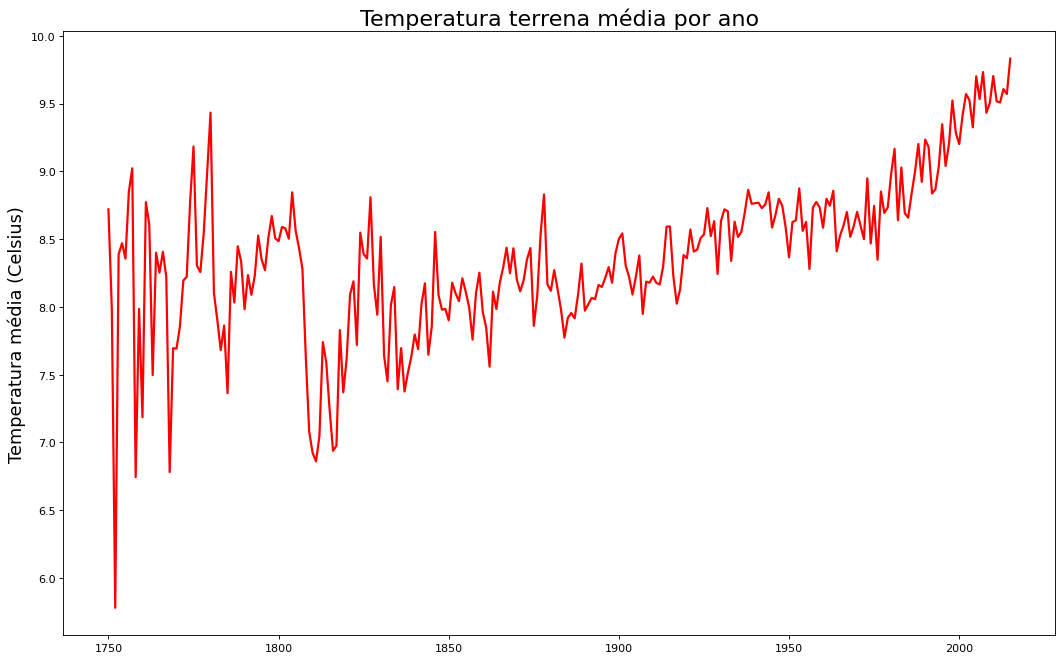

In [11]:
x = [d for d in df['Ano']]

plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("Temperatura média (Celsius)", fontsize=16)  
plt.title("Temperatura terrena média por ano", fontsize=20)
plt.plot(x, df['LandAverageTemperature'], color="red", lw=2) 

##Correlação de Pearson

In [12]:
correlacao, p = pearsonr(df['Ano'], df['LandAverageTemperature'])
print('Correlação de Pearson entre Ano e Temperatura Média Terrena: ',"{:.3f}".format(correlacao))

Correlação de Pearson entre Ano e Temperatura Média Terrena:  0.622


Indica correlação positiva moderada/forte

##Definindo a Regressão Linear

In [13]:
regLinear = LinearRegression()

In [17]:
x = df['Ano']
y = df['LandAverageTemperature']

x = x.values.reshape(-1,1)

In [25]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size = 0.8)
regLinear.fit(x_treino, y_treino)
regLinear.score(x_teste, y_teste)

0.32182377066423307

In [26]:
y_pred = regLinear.predict(x_teste)
years = pd.DataFrame(x_teste)

##Linha de Regressão

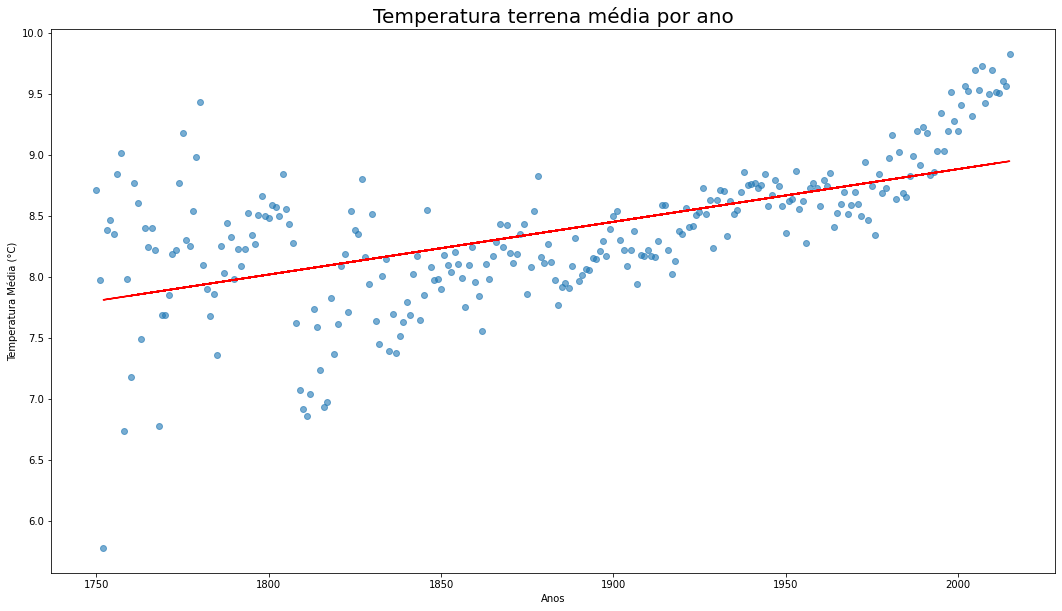

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(18,10))
plt.scatter(x, y, alpha=0.6)
plt.plot(x_teste, y_pred, color="red")
plt.title("Temperatura terrena média por ano", fontsize=20)
plt.xlabel('Anos')
plt.ylabel('Temperatura Média (°C)')
plt.show()
plt.clf()

##Previsões da temperatura média

In [27]:
print("Temperatura média prevista para 2030:",regLinear.predict(np.array([2030]).reshape(-1,1)))
print("Temperatura média prevista para 2040:",regLinear.predict(np.array([2040]).reshape(-1,1)))

Temperatura média prevista para 2030: [9.08519951]
Temperatura média prevista para 2040: [9.13400547]
